In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

### Data Collection ###

In [3]:
train_data = pd.read_excel(r'Data_Train.xlsx') #r is used to convert normal string to raw string
# train_data is our raw data

In [4]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
train_data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


### Data Cleaning ###

In [7]:
# Data cleaning may involve a lot of steps. We can start with some basic steps like missing values, duplicate values, etc.

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


##### From the above info about train_data, we can see that Route and Total_Stops columns have lesser non-null values in comparison to other columns. This implies that these columns may have missing values. #####

In [10]:
train_data.isnull() #returns a boolean value

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
10678,False,False,False,False,False,False,False,False,False,False,False
10679,False,False,False,False,False,False,False,False,False,False,False
10680,False,False,False,False,False,False,False,False,False,False,False
10681,False,False,False,False,False,False,False,False,False,False,False


In [11]:
train_data.isnull().sum() #returns how many null values are present and in which column/s

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

##### The above table conveys that there is one missing value in each Route and Total_Stops column/s. Since the count of missing values is really low, we can drop the row/rows where these values are missing. #####

In [13]:
train_data[train_data['Route'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


##### As we can see above that both the null values belong to this row, we can drop this row from the data frame. #####

In [15]:
train_data.dropna(inplace=True)

In [16]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [17]:
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [18]:
train_data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 6.3 MB


##### We'll now move on to Data Pre-processing #####

In [20]:
data = train_data.copy() #Creating a copy of the data to perform operations

In [21]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [22]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


##### What we can do is, split the Date_of_Journey column in three separate columns - Journey Date, Journey Month and Journey Year. This would make it easier for us to feed this data into a ML model and get meaningful insights from it. #####

##### Also, Date_of_Journey, Dep_Time and Arrival_Time have the datatype as object. We need to change it to timestamp for better calculation. ##### 

In [25]:
def change_to_datetime(col):
    data[col] = pd.to_datetime(data[col]) #function written to change the datatype from object/string to datetime

In [26]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [27]:
for feature in ['Date_of_Journey', 'Dep_Time', 'Arrival_Time']:
    change_to_datetime(feature)

In [28]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [29]:
data['Journey_year'] = data['Date_of_Journey'].dt.year 
data['Journey_month'] = data['Date_of_Journey'].dt.month
data['Journey_day'] = data['Date_of_Journey'].dt.day

In [30]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_year,Journey_month,Journey_day
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-02-04 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,2019,3,24
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-02-04 05:50:00,2025-02-04 13:15:00,7h 25m,2 stops,No info,7662,2019,5,1
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2025-02-04 09:25:00,2025-06-10 04:25:00,19h,2 stops,No info,13882,2019,6,9


##### We have created three new columns for better model training. We will now move towards processing the columns Dep_Time and Arrival_Time for better understanding. #####

In [32]:
#Extracting departure hour & minute and arrival hour & minute
def extract_hour_and_minute(df, col):
    df[col + "_Hour"] = df[col].dt.hour
    df[col + "_Minute"] = df[col].dt.minute
    return df.head(5)

In [33]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_year,Journey_month,Journey_day
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-02-04 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,2019,3,24
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-02-04 05:50:00,2025-02-04 13:15:00,7h 25m,2 stops,No info,7662,2019,5,1
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2025-02-04 09:25:00,2025-06-10 04:25:00,19h,2 stops,No info,13882,2019,6,9
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2025-02-04 18:05:00,2025-02-04 23:30:00,5h 25m,1 stop,No info,6218,2019,5,12
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2025-02-04 16:50:00,2025-02-04 21:35:00,4h 45m,1 stop,No info,13302,2019,3,1


In [34]:
extract_hour_and_minute(data, "Dep_Time")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_year,Journey_month,Journey_day,Dep_Time_Hour,Dep_Time_Minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-02-04 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,2019,3,24,22,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-02-04 05:50:00,2025-02-04 13:15:00,7h 25m,2 stops,No info,7662,2019,5,1,5,50
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2025-02-04 09:25:00,2025-06-10 04:25:00,19h,2 stops,No info,13882,2019,6,9,9,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2025-02-04 18:05:00,2025-02-04 23:30:00,5h 25m,1 stop,No info,6218,2019,5,12,18,5
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2025-02-04 16:50:00,2025-02-04 21:35:00,4h 45m,1 stop,No info,13302,2019,3,1,16,50


In [35]:
extract_hour_and_minute(data, "Arrival_Time")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_year,Journey_month,Journey_day,Dep_Time_Hour,Dep_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-02-04 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,2019,3,24,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-02-04 05:50:00,2025-02-04 13:15:00,7h 25m,2 stops,No info,7662,2019,5,1,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2025-02-04 09:25:00,2025-06-10 04:25:00,19h,2 stops,No info,13882,2019,6,9,9,25,4,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2025-02-04 18:05:00,2025-02-04 23:30:00,5h 25m,1 stop,No info,6218,2019,5,12,18,5,23,30
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2025-02-04 16:50:00,2025-02-04 21:35:00,4h 45m,1 stop,No info,13302,2019,3,1,16,50,21,35


In [36]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_year,Journey_month,Journey_day,Dep_Time_Hour,Dep_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-02-04 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,2019,3,24,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-02-04 05:50:00,2025-02-04 13:15:00,7h 25m,2 stops,No info,7662,2019,5,1,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2025-02-04 09:25:00,2025-06-10 04:25:00,19h,2 stops,No info,13882,2019,6,9,9,25,4,25


In [37]:
cols_to_drop = ['Arrival_Time','Dep_Time']
data.drop(cols_to_drop , axis = 1, inplace = True)

In [38]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_year,Journey_month,Journey_day,Dep_Time_Hour,Dep_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,2019,3,24,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,2019,5,1,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,2019,6,9,9,25,4,25


### Data Analysis ###
##### Problem statement 1: Analysing when do most of the flights take off #####

In [40]:
data['Dep_Time_Hour'].value_counts() #This gives a fair idea about the busiest departure hour

Dep_Time_Hour
9     915
7     867
8     697
17    695
6     687
20    651
5     629
11    580
19    567
10    536
14    523
21    492
16    472
18    444
13    417
22    387
15    319
2     194
12    178
4     170
23    161
0      40
1      37
3      24
Name: count, dtype: int64

##### The above data shows that most of the flights take off in the morning, but to make it appealing, we'll aim at drawing a chart which showcases the same data, in a better manner. #####

In [42]:
# We are writing a function to determine the time of day (morning, evening, night, etc)
def flight_dep_time(x):
    if (x>4) and (x<=8):
        return "Early Morning"
    elif (x>8) and (x<=12):
        return "Morning"
    elif (x>12) and (x<=16):
        return "Afternoon"
    elif (x>16) and (x<=20):
        return "Evening"
    elif (x>20) and (x<=24):
        return "Night"
    else:
        return "Late Night"

<Axes: xlabel='Dep_Time_Hour'>

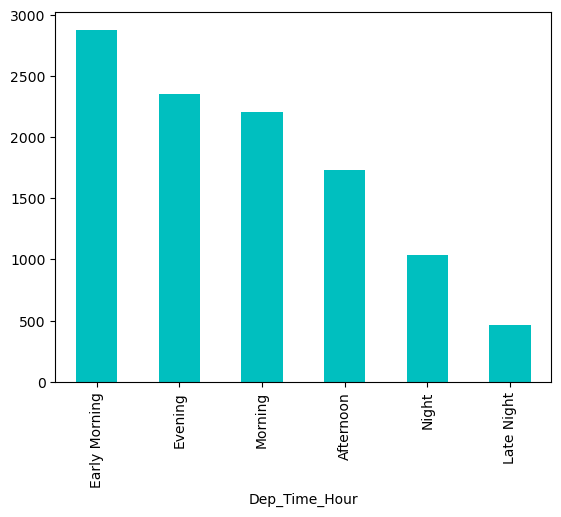

In [43]:
data['Dep_Time_Hour'].apply(flight_dep_time).value_counts().plot(kind='bar', color='c')

##### The above bar chart shows that most of the flights take off during early morning. #####

In [45]:
# To make the chart more interactive, we'll use plotly.
!pip install plotly
!pip install chart_studio

In [46]:
!pip install cufflinks

In [47]:
import plotly 
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)
cf.go_offline()

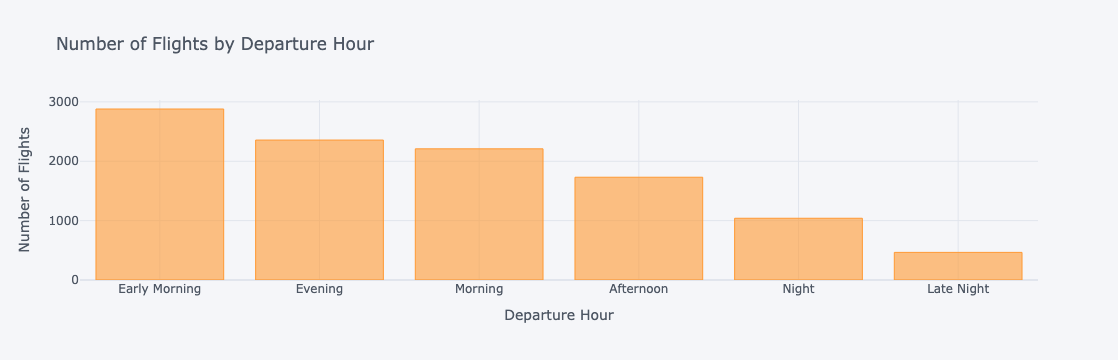

In [48]:
data['Dep_Time_Hour'].apply(flight_dep_time).value_counts().iplot(
    kind='bar',
    xTitle='Departure Hour',
    yTitle='Number of Flights',
    title='Number of Flights by Departure Hour'
)

##### Data Processing: Prepping the Duration column for analysis #####

In [50]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_year,Journey_month,Journey_day,Dep_Time_Hour,Dep_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,2019,3,24,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,2019,5,1,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,2019,6,9,9,25,4,25


##### The duration column is a string object which is a mix of two elements: Hours and Minutes. But there would be flights which take some hours and 0 minutes or 0 hours and some minutes. Therefore, we need to process the Duration column accordingly. #####

In [52]:
def preprocess_duration(x):
    if 'h' not in x:
        return "0h" + " " + x
    elif 'm' not in x:
        return x + " " + "0m"
    else:
        return x

In [53]:
data['Duration'] = data['Duration'].apply(preprocess_duration)

In [54]:
data.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_year,Journey_month,Journey_day,Dep_Time_Hour,Dep_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,2019,3,24,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,2019,5,1,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,2019,6,9,9,25,4,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,2019,5,12,18,5,23,30
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,2019,3,1,16,50,21,35


In [55]:
data['Duration_Hours'] = data['Duration'].apply(lambda x: int(x.split(' ')[0][0:-1]))


In [56]:
data['Duration_Minutes'] = data['Duration'].apply(lambda x: int(x.split(' ')[1][0:-1]))

In [57]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_year,Journey_month,Journey_day,Dep_Time_Hour,Dep_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute,Duration_Hours,Duration_Minutes
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,2019,3,24,22,20,1,10,2,50
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,2019,5,1,5,50,13,15,7,25
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,2019,6,9,9,25,4,25,19,0


#### Analysing impact of Duration on Flight prices ####

In [105]:
data['Duration']

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

##### The above data is available in hour and min format, but to calculate total duration of a flight we'll have to multiply the hours by 60 and minutes by 1, so that we have the total duration in minutes. This will make the analysis easier. #####

In [110]:
data['Total_Flight_Duration_(in_minutes)'] = data['Duration_Hours']*60 + data['Duration_Minutes']*1

In [116]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_year,Journey_month,Journey_day,Dep_Time_Hour,Dep_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute,Duration_Hours,Duration_Minutes,Total_Flight_Duration_(in_minutes)
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,2019,3,24,22,20,1,10,2,50,170
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,2019,5,1,5,50,13,15,7,25,445
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,2019,6,9,9,25,4,25,19,0,1140


In [118]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_year',
       'Journey_month', 'Journey_day', 'Dep_Time_Hour', 'Dep_Time_Minute',
       'Arrival_Time_Hour', 'Arrival_Time_Minute', 'Duration_Hours',
       'Duration_Minutes', 'Total_Flight_Duration_(in_minutes)'],
      dtype='object')

##### Scatter Plot for Price vs Duration of Flight (in minutes) #####

<Axes: xlabel='Total_Flight_Duration_(in_minutes)', ylabel='Price'>

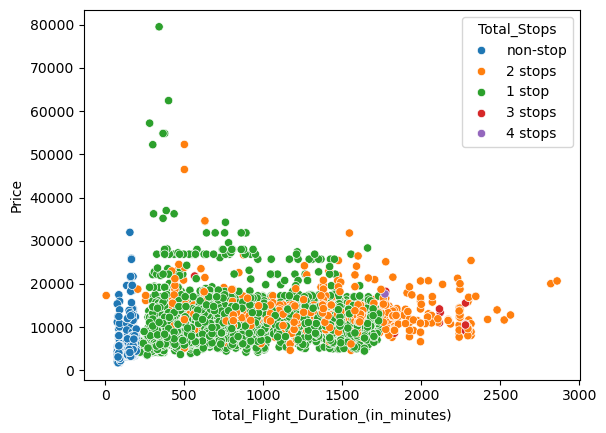

In [130]:
sns.scatterplot(data, x='Total_Flight_Duration_(in_minutes)', y='Price',hue='Total_Stops')

##### Regression Plot for Price vs Duration of Flight (in minutes) #####

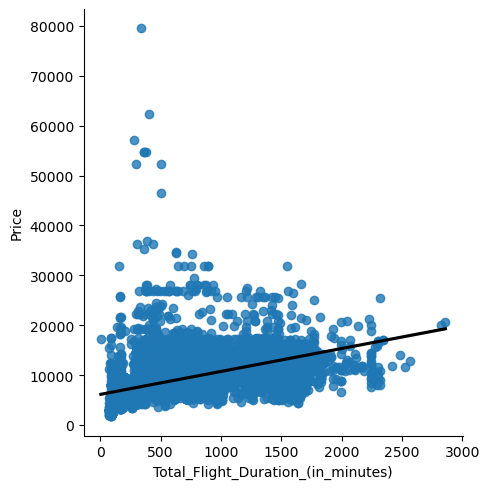

In [150]:
sns.lmplot(data, x='Total_Flight_Duration_(in_minutes)', y='Price',line_kws={'color': 'black'})

##### The best fit line shows that Prices are lower for lesser duration flights. #####

#### Problem Statements:

1. **On which route is Jet Airways used the most?**  
2. **How does the price vary across different airlines? (Airline vs Price Analysis)**

In [159]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_year,Journey_month,Journey_day,Dep_Time_Hour,Dep_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute,Duration_Hours,Duration_Minutes,Total_Flight_Duration_(in_minutes)
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,2019,3,24,22,20,1,10,2,50,170
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,2019,5,1,5,50,13,15,7,25,445
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,2019,6,9,9,25,4,25,19,0,1140


In [203]:
data[data['Airline']=='Jet Airways']['Route'].value_counts()

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
BOM → DED → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
Name: count, dtype: int64

##### The above data shows that Jet Airways is the most used airline on the **CCU → BOM → BLR** route. #####

#### Airline vs Price Analysis ####

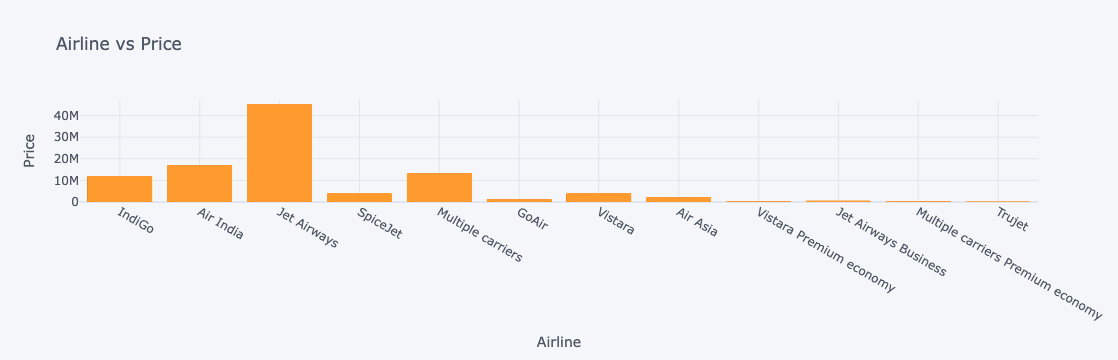

In [227]:
data.iplot(kind='bar', x='Airline', y='Price', title='Airline vs Price',xTitle='Airline',yTitle='Price')

##### We can analyse Airline Price by finding out the max, min, 25th percentile, mean, median, 75th percentile values for Price. #####

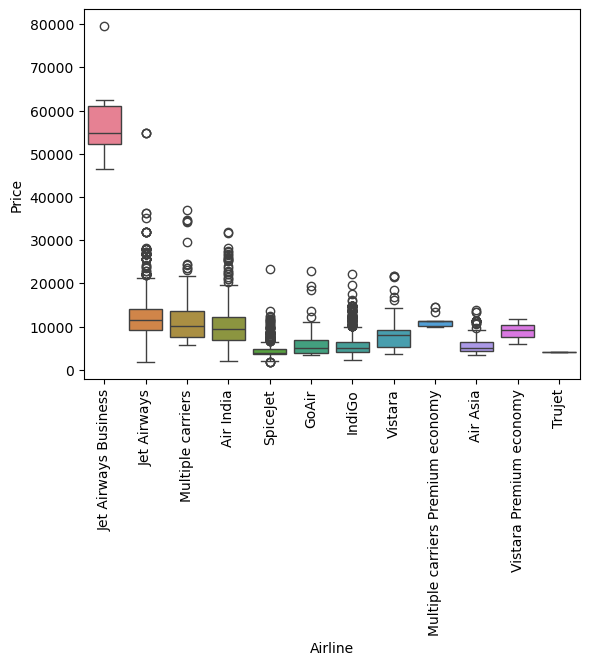

In [242]:
sns.boxplot (x='Airline', y='Price', data = data.sort_values('Price', ascending=False), hue='Airline')
plt.xticks(rotation=90)
plt.show()

##### The above boxplot can be used to derive insights such as mean, median, 25th and 75th percentile values for prices of different airlines. #####

#### Feature engineering : One-hot encoding ####

##### One-hot encoding is a technique used to convert categorical variables into numerical format so that machine learning models can process them. It transforms each category into a separate binary (0 or 1) column. #####

##### One-hot encoding is used with Nominal (un-ordered) data. #####

In [249]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_year,Journey_month,Journey_day,Dep_Time_Hour,Dep_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute,Duration_Hours,Duration_Minutes,Total_Flight_Duration_(in_minutes)
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,2019,3,24,22,20,1,10,2,50,170
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,2019,5,1,5,50,13,15,7,25,445
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,2019,6,9,9,25,4,25,19,0,1140


In [264]:
data['Source'].value_counts() ## It can be seen that the source data is nominal and therefore we can apply one-hot encoding on the same.

Source
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

In [280]:
## We'll first sort the columns into categorical (datatype = object) and numerical columns. 
cat_col = [col for col in data.columns if data[col].dtype=='object']
num_col = [col for col in data.columns if data[col].dtype!='object']

In [284]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [288]:
## Applying one-hot encoding from scratch
data['Source'].apply(lambda x : 1 if x=='Banglore' else 0)

0        1
1        0
2        0
3        0
4        1
        ..
10678    0
10679    0
10680    1
10681    1
10682    0
Name: Source, Length: 10682, dtype: int64

In [290]:
for sub_category in data['Source'].unique():
    data['Source_'+sub_category] = data['Source'].apply(lambda x : 1 if x==sub_category else 0)

In [296]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_year,...,Arrival_Time_Hour,Arrival_Time_Minute,Duration_Hours,Duration_Minutes,Total_Flight_Duration_(in_minutes),Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,2019,...,1,10,2,50,170,1,0,0,0,0
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,2019,...,13,15,7,25,445,0,1,0,0,0
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,2019,...,4,25,19,0,1140,0,0,1,0,0
